IMPORT

In [ ]:
!pip install torch torchvision
!pip install numpy
!pip install scipy
!pip install h5py
!pip install matplotlib
!pip install pillow
!pip install scikit-learn
!pip install scikit-image
!pip install pandas

MOUNTING GOOGLE DRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


EXTRACT ZIP FILE

In [ ]:
%cd /content/drive/My Drive/AAR
# importing required modules 
from zipfile import ZipFile 

# specifying the zip file name 
file_name = "seed.zip"

# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
	# printing all the contents of the zip file 
	zip.printdir() 

	# extracting all the files 
	print('Extracting all the files now...') 
	zip.extractall() 
	print('Done!') 

RENAME IMAGES

In [ ]:
# importing required modules 
import os

def fn_rename_file(path):
  last_word = path.rsplit('/', 2)[1]
  for count, filename in enumerate(os.listdir(path)):
    src_name = path + filename
    dst_name = path + last_word + str(count) + ".jpg"
    os.rename(src_name, dst_name) 
    print(src_name + " => " + dst_name)

# Driver Code 
if __name__ == '__main__': 

  # Change the name of the files for good seeds
  path = "/content/drive/My Drive/AAR/seed/GoodSeed/"
  fn_rename_file(path)

  # Change the name of the files for bad seeds
  path = "/content/drive/My Drive/AAR/seed/BadSeed/"
  fn_rename_file(path)

Note that the following code expects your files to be named in sequential order with no breaks in between, e.g, 

*   GoodSeed9.jpg
*   GoodSeed10.jpg       
*   GoodSeed11.jpg

and not like this

*   GoodSeed9.jpg
*   GoodSeed11.jpg       
*   GoodSeed12.jpg

If there is an error when running please check the filenames




 


CROPPING IMAGE AND STORE INTO 1 FOLDER
- Crop_Seed

In [ ]:
#same operation as above but, writing to a single folder 
import os
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

!mkdir '/content/drive/My Drive/AAR/seed/Crop_Seed/'

path_Good = "/content/drive/My Drive/AAR/seed/GoodSeed/"
path_Bad = "/content/drive/My Drive/AAR/seed/BadSeed/"
path_Crop = "/content/drive/My Drive/AAR/seed/Crop_Seed/"

file_len = 0
passes = 0 
count_good_image = 0 
count_bad_image = 0 

#passes through GoodSeed folder and BadSeed folder 
while passes < 2: 

  if passes == 0:
    path = path_Good
    seedtype = 'GoodSeed'
    #reserve 20 image for testing, therefore -20 
    file_len = int(len(os.listdir(path))) - 20
    print("FILE LENGTH = ", file_len)

  else: 
    path = path_Bad
    seedtype = 'BadSeed'
    file_len = int(len(os.listdir(path))) - 20
    print("FILE LENGTH = ", file_len)
    
  passes += 1 

  for i in range(file_len):

    seedNum = i+20
    path_read = path + seedtype + str(seedNum) + '.jpg'

    path_write = path_Crop

    image = cv2.imread(path_read, cv2.IMREAD_UNCHANGED)

    #crop some part of top and bottom of the image to remove noise
    image = image[200:3400, 0:5472]
    ori_image = image

    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.threshold(image, 90, 255, cv2.THRESH_BINARY_INV)

    #connect edges together to form a whole seed
    kernel = np.ones((50,50), np.uint8)
    image = cv2.morphologyEx(image[1], cv2.MORPH_CLOSE, kernel)
    kernel = np.ones((30,30), np.uint8)
    image = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

    #algorithm to get the size and the coordiante of each seed
    n_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(image)
    for label in range(1,n_labels):
      width = stats[label, cv2.CC_STAT_WIDTH]
      height = stats[label, cv2.CC_STAT_HEIGHT]
      x = stats[label, cv2.CC_STAT_LEFT]
      y = stats[label, cv2.CC_STAT_TOP]

      # Create a copy of the interest region and add padding to roi 
      # padding to allow parts to be capture outside the seeds (for example, a long stem)
      horizontal_padding = 50
      vertical_padding = 50

      roi = ori_image[y- vertical_padding :(y+height+ vertical_padding ), x- horizontal_padding :(x+width+ horizontal_padding )] # add padding to boxes
      print(str(seedNum) + ' - ' + str(label) )

      #writes the image of segregated seed to a folder in drive
      cv2.imwrite(path_write + 'Crop' + seedtype + str(seedNum) + '_' + str(label - 1) + '.jpg', roi)
      
      #because passes incremented by one while still looping good seed
      #therefore passes 1 here means good seed 
      if passes == 1: 
        count_good_image+=1
      else:
        count_bad_image+=1 

      print('count good : ' + str(count_good_image))

      print('count bad : ' + str(count_bad_image))


Streaming output truncated to the last 5000 lines.
count bad : 0
27 - 6
count good : 77
count bad : 0
27 - 7
count good : 78
count bad : 0
27 - 8
count good : 79
count bad : 0
27 - 9
count good : 80
count bad : 0
27 - 10
count good : 81
count bad : 0
28 - 1
count good : 82
count bad : 0
28 - 2
count good : 83
count bad : 0
28 - 3
count good : 84
count bad : 0
28 - 4
count good : 85
count bad : 0
28 - 5
count good : 86
count bad : 0
28 - 6
count good : 87
count bad : 0
28 - 7
count good : 88
count bad : 0
28 - 8
count good : 89
count bad : 0
28 - 9
count good : 90
count bad : 0
28 - 10
count good : 91
count bad : 0
29 - 1
count good : 92
count bad : 0
29 - 2
count good : 93
count bad : 0
29 - 3
count good : 94
count bad : 0
29 - 4
count good : 95
count bad : 0
29 - 5
count good : 96
count bad : 0
29 - 6
count good : 97
count bad : 0
29 - 7
count good : 98
count bad : 0
29 - 8
count good : 99
count bad : 0
29 - 9
count good : 100
count bad : 0
29 - 10
count good : 101
count bad : 0
30 - 

CREATE CSV(TEST, TRAINING, VALIDATE) AND LABEL THE SEEDS 

In [ ]:
import os
import csv
import cv2

path1 = "/content/drive/My Drive/AAR/seed/GoodSeed/"
path2 = "/content/drive/My Drive/AAR/seed/BadSeed/"

path_crop = "/content/drive/My Drive/AAR/seed/Crop_Seed/"

# create test data with the first 20 images of good and bad seeds
with open('/content/drive/My Drive/AAR/testdata.csv', 'w', newline='') as test:
  writer_test = csv.writer(test)
  writer_test.writerow(["image_name", "label"])

  for count, filename in zip(range(20), os.listdir(path1)):
    writer_test.writerow([filename, 1])

  for count, filename in zip(range(20), os.listdir(path2)):
    writer_test.writerow([filename, 0])

#split the image of individual seeds to 80% for training and 20% for validation
split_goodseed = count_good_image * 0.8 #893 of individual good seed image
split_badseed = count_bad_image * 0.8 #849 of individual bad seed image

count_good_split = 0
count_bad_split = 0

good_seed = 'Good'
bad_seed = 'Bad'

# using the image of individual seed, to create training and valid data set 
with open('/content/drive/My Drive/AAR/trainingdata.csv', 'w', newline='') as training,\
      open('/content/drive/My Drive/AAR/validate.csv', 'w', newline='') as val:
    writer_tran = csv.writer(training)
    writer_tran.writerow(["image_name", "label"])

    writer_val = csv.writer(val)
    writer_val.writerow(["image_name", "label"])

    
    for count, filename in enumerate(os.listdir(path_crop)):
      # if filename consist Good, then label the image as 1 
      if good_seed in filename:
        #once 80% of good seed image written to training.csv, 
        #writes the remaning 20% to validation
        if count_good_split > split_goodseed:
          writer_val.writerow([filename, 1])
        else:
          writer_tran.writerow([filename, 1])
        
        count_good_split += 1
      
      # same operation but label bad seed as 0 
      if bad_seed in filename:
        if count_bad_split > split_badseed:
          writer_val.writerow([filename, 0])
        else:
          writer_tran.writerow([filename, 0])

        count_bad_split += 1

CREATE DATAFRAMES

In [ ]:
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense, Flatten
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils as u

import tensorflow as tf

import keras
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd

# Classes :
# 0 : Bad Seed
# 1 : Good Seed

# file path for training data
path_crop = "/content/drive/My Drive/AAR/seed/Crop_Seed/"

# load csvs containing filename and class labels
df_train = pd.read_csv('/content/drive/My Drive/AAR/trainingdata.csv', dtype='string')
df_validate = pd.read_csv('/content/drive/My Drive/AAR/validate.csv', dtype='string')

# initialize image data generator
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode="nearest",
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None,
)

# storing the images directly into a variable will eat up all available RAM so instead
# we use flow_from_dataframe so that the program reads the images from the csv as it runs
train_data = datagen.flow_from_dataframe(
    dataframe=df_train,
    directory=path_crop,
    x_col="image_name",
    y_col="label",
    weight_col=None,
    color_mode="rgb",
    classes=['0', '1'],
    class_mode="binary",
    batch_size=1,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix="",
    save_format="png",
    subset=None,
    interpolation="nearest",
    validate_filenames=True
)

valid_data = datagen.flow_from_dataframe(
    dataframe=df_validate,
    directory=path_crop,
    x_col="image_name",
    y_col="label",
    weight_col=None,
    color_mode="rgb",
    classes=['0','1'],
    class_mode="binary",
    batch_size=1,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix="",
    save_format="png",
    subset=None,
    interpolation="nearest",
    validate_filenames=True,
)


Found 1395 validated image filenames belonging to 2 classes.
Found 347 validated image filenames belonging to 2 classes.


TEST IF IMAGES WERE LOADED

(1, 256, 256, 3)
(1,)


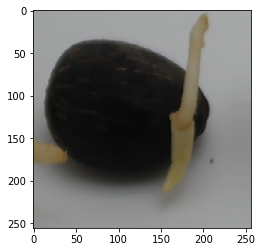

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt


print(train_data[0][0].shape)
print(train_data[0][1].shape)
plt.imshow(train_data[510][0][0]/255.) # change the first index of train_data to change the image

**CNN**

In [ ]:
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense, Flatten
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils as u

model = Sequential()

# Adding layers to the model

# Conv1
model.add(Conv2D(32, (5, 5), input_shape=(256, 256, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 40% dropout (dropout sets some of the nodes to 0)
model.add(Dropout(0.4))

# Conv2
model.add(Conv2D(64, (5, 5))) # in layer 1 you need to specify input shape this is not needed in subsequent layers
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 40% dropout
model.add(Dropout(0.4))

# Conv3
model.add(Conv2D(128, (5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 30% dropout
model.add(Dropout(0.3))

# In a convolution NN, we neet to flatten our data before we can input it into the ouput/dense layer
model.add(Flatten()) # change input into a 1 dimensional array

# dense network layer
model.add(Dense(128))
model.add(Activation('relu'))

# 20% dropout
model.add(Dropout(0.2))

model.add(Dense(128))
model.add(Activation('relu'))

# finally, since our output is binary, our output layer will be a single neuron
model.add(Dense(1))
model.add(Activation('sigmoid')) # the sigmoid layer will scale all values down to between 0 and 1 which represents probability index


In [ ]:
keras.backend.clear_session() # use this to reset the model and graphs

In [ ]:
# callback to stop training once val_accuracy reaches a specified amount
# "val_accuracy" can be changed to monitor other parameters
class MyThresholdCallback(tf.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(MyThresholdCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None): 
        val_acc = logs["val_accuracy"]
        if val_acc >= self.threshold:
            self.model.stop_training = True

In [ ]:
import tensorflow as tf

# Gradient descent using Adam optimizer
optimizer = keras.optimizers.Adam(learning_rate=0.0001) 

# tf.keras.callbacks.EarlyStopping(
#                 monitor='val_accuracy', min_delta=0, patience=5, verbose=0,
#                 mode='auto', baseline=None, restore_best_weights=False
#             ),

# This callback will monitor the val_loss of each epoch and save/overwrite the model checkpoint each time it reaches the lowest recorded value
callbacks = [tf.keras.callbacks.ModelCheckpoint(
                "/content/drive/My Drive/AAR/checkpoint/", monitor='val_loss', verbose=0, save_best_only=True,
                save_weights_only=False, mode='auto', save_freq='epoch',
                options=None
            )]
             

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

# Model training
nb_epoch = 20 # number of iterations to train on

# Our data is slightly unbalanced with more good seeds so we add class weights to attempt to minimize any bias
weight = 716/680 # 716 good seeds, 680 bad seeds
class_weights = {0: weight, # increase weight for the bad seeds
                 1: 1.
                }

# Train the model
# Note that training will eat up RAM, if the runtime crashes due to insufficient RAM, reset the colab runtime and load the model again from the code below
# You can continue training after loading the model, just be aware of the session's RAM usage
model_fit = model.fit(train_data, class_weight=class_weights, epochs=nb_epoch, validation_data=valid_data, callbacks=callbacks)


Epoch 1/20
1395/1395 [==============================] - 41s 27ms/step - loss: 0.2709 - accuracy: 0.9154 - val_loss: 0.4544 - val_accuracy: 0.7839
INFO:tensorflow:Assets written to: /content/drive/My Drive/AAR/checkpoint/assets
Epoch 2/20
1395/1395 [==============================] - 38s 27ms/step - loss: 0.2708 - accuracy: 0.9147 - val_loss: 0.3180 - val_accuracy: 0.8876
INFO:tensorflow:Assets written to: /content/drive/My Drive/AAR/checkpoint/assets
Epoch 3/20
1395/1395 [==============================] - 38s 27ms/step - loss: 0.2431 - accuracy: 0.9155 - val_loss: 0.2763 - val_accuracy: 0.8703
INFO:tensorflow:Assets written to: /content/drive/My Drive/AAR/checkpoint/assets
Epoch 4/20
1395/1395 [==============================] - 38s 27ms/step - loss: 0.2702 - accuracy: 0.9074 - val_loss: 0.3053 - val_accuracy: 0.8617
Epoch 5/20
1395/1395 [==============================] - 37s 26ms/step - loss: 0.2578 - accuracy: 0.9148 - val_loss: 0.5083 - val_accuracy: 0.7867
Epoch 6/20
1395/1395 [=====

SAVE THE MODEL

In [ ]:
model.save('/content/drive/My Drive/AAR/model/') # save to model directory

INFO:tensorflow:Assets written to: /content/drive/My Drive/AAR/model/assets


LOAD THE MODEL

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/My Drive/AAR/checkpoint/') # load from checkpoint
# model = keras.models.load_model('/content/drive/My Drive/AAR/model/') # load from model directory

PERFORM PREDICTION ON TEST DATA SET

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy = 1.0
Correct seeds = 1
Prediction = [[1]]
Accuracy = 1.0
Correct seeds = 2
Prediction = [[1]]
Accuracy = 1.0
Correct seeds = 3
Prediction = [[1]]
Accuracy = 1.0
Correct seeds = 4
Prediction = [[1]]
Accuracy = 1.0
Correct seeds = 5
Prediction = [[1]]
Accuracy = 1.0
Correct seeds = 6
Prediction = [[1]]
Accuracy = 1.0
Correct seeds = 7
Prediction = [[1]]
Accuracy = 1.0
Correct seeds = 8
Prediction = [[1]]
Accuracy = 1.0
Correct seeds = 9
Prediction = [[1]]
Accuracy = 1.0
Correct seeds = 10
Prediction = [[1]]


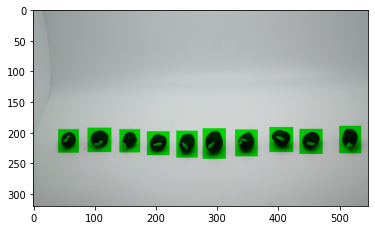

Accuracy = 1.0
Correct seeds = 11
Prediction = [[1]]
Accuracy = 1.0
Correct seeds = 12
Prediction = [[1]]
Accuracy = 1.0
Correct seeds = 13
Prediction = [[1]]
Accuracy = 1.0
Correct seeds = 14
Prediction = [[1]]
Accuracy = 1.0
Correct seeds = 15
Prediction = [[1]]
Accuracy = 1.0
Correct seeds = 16
Prediction = [[1]]
Accuracy = 1.0
Correct seeds = 17
Prediction = [[1]]
Accuracy = 1.0
Correct seeds = 18
Prediction = [[1]]
Accuracy = 1.0
Correct seeds = 19
Prediction = [[1]]
Accuracy = 1.0
Correct seeds = 20
Prediction = [[1]]


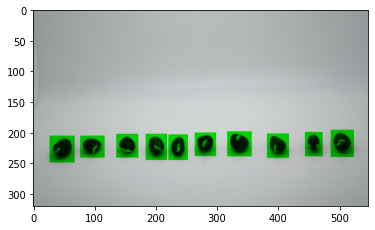

Accuracy = 1.0
Correct seeds = 21
Prediction = [[1]]
Accuracy = 1.0
Correct seeds = 22
Prediction = [[1]]
Accuracy = 1.0
Correct seeds = 23
Prediction = [[1]]
Accuracy = 1.0
Correct seeds = 24
Prediction = [[1]]
Accuracy = 1.0
Correct seeds = 25
Prediction = [[1]]
Accuracy = 1.0
Correct seeds = 26
Prediction = [[1]]
Accuracy = 1.0
Correct seeds = 27
Prediction = [[1]]
Accuracy = 1.0
Correct seeds = 28
Prediction = [[1]]
Accuracy = 1.0
Correct seeds = 29
Prediction = [[1]]
Accuracy = 1.0
Correct seeds = 30
Prediction = [[1]]


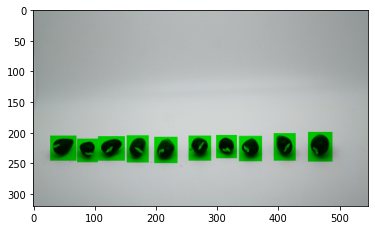

Accuracy = 1.0
Correct seeds = 31
Prediction = [[1]]
Accuracy = 1.0
Correct seeds = 32
Prediction = [[1]]
Accuracy = 1.0
Correct seeds = 33
Prediction = [[1]]
Accuracy = 1.0
Correct seeds = 34
Prediction = [[1]]
Accuracy = 1.0
Correct seeds = 35
Prediction = [[1]]
Accuracy = 1.0
Correct seeds = 36
Prediction = [[1]]
Accuracy = 1.0
Correct seeds = 37
Prediction = [[1]]
Accuracy = 1.0
Correct seeds = 38
Prediction = [[1]]
Accuracy = 1.0
Correct seeds = 39
Prediction = [[1]]


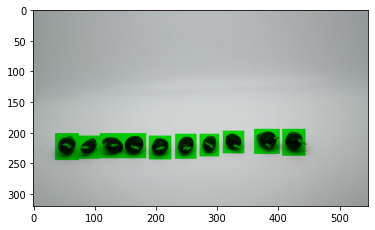

Accuracy = 1.0
Correct seeds = 40
Prediction = [[1]]
Accuracy = 1.0
Correct seeds = 41
Prediction = [[1]]
Accuracy = 1.0
Correct seeds = 42
Prediction = [[1]]
Accuracy = 1.0
Correct seeds = 43
Prediction = [[1]]
Accuracy = 1.0
Correct seeds = 44
Prediction = [[1]]
Accuracy = 1.0
Correct seeds = 45
Prediction = [[1]]
Accuracy = 1.0
Correct seeds = 46
Prediction = [[1]]
Accuracy = 1.0
Correct seeds = 47
Prediction = [[1]]
Accuracy = 1.0
Correct seeds = 48
Prediction = [[1]]
Accuracy = 1.0
Correct seeds = 49
Prediction = [[1]]


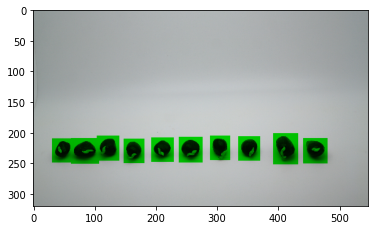

Accuracy = 1.0
Correct seeds = 50
Prediction = [[1]]
Accuracy = 0.9803921568627451
Correct seeds = 50
Prediction = [[0]]
Accuracy = 0.9807692307692307
Correct seeds = 51
Prediction = [[1]]
Accuracy = 0.9811320754716981
Correct seeds = 52
Prediction = [[1]]
Accuracy = 0.9814814814814815
Correct seeds = 53
Prediction = [[1]]
Accuracy = 0.9818181818181818
Correct seeds = 54
Prediction = [[1]]
Accuracy = 0.9821428571428571
Correct seeds = 55
Prediction = [[1]]
Accuracy = 0.9824561403508771
Correct seeds = 56
Prediction = [[1]]
Accuracy = 0.9827586206896551
Correct seeds = 57
Prediction = [[1]]
Accuracy = 0.9830508474576272
Correct seeds = 58
Prediction = [[1]]


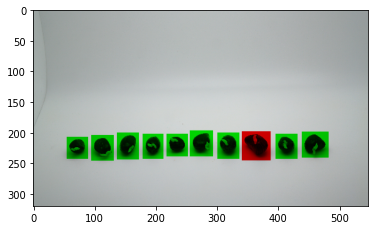

Accuracy = 0.9833333333333333
Correct seeds = 59
Prediction = [[1]]
Accuracy = 0.9836065573770492
Correct seeds = 60
Prediction = [[1]]
Accuracy = 0.9838709677419355
Correct seeds = 61
Prediction = [[1]]
Accuracy = 0.9841269841269841
Correct seeds = 62
Prediction = [[1]]
Accuracy = 0.984375
Correct seeds = 63
Prediction = [[1]]
Accuracy = 0.9846153846153847
Correct seeds = 64
Prediction = [[1]]
Accuracy = 0.9848484848484849
Correct seeds = 65
Prediction = [[1]]
Accuracy = 0.9850746268656716
Correct seeds = 66
Prediction = [[1]]
Accuracy = 0.9852941176470589
Correct seeds = 67
Prediction = [[1]]
Accuracy = 0.9855072463768116
Correct seeds = 68
Prediction = [[1]]


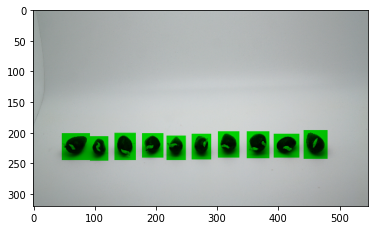

Accuracy = 0.9857142857142858
Correct seeds = 69
Prediction = [[1]]
Accuracy = 0.9859154929577465
Correct seeds = 70
Prediction = [[1]]
Accuracy = 0.9861111111111112
Correct seeds = 71
Prediction = [[1]]
Accuracy = 0.9863013698630136
Correct seeds = 72
Prediction = [[1]]
Accuracy = 0.9864864864864865
Correct seeds = 73
Prediction = [[1]]
Accuracy = 0.9866666666666667
Correct seeds = 74
Prediction = [[1]]
Accuracy = 0.9868421052631579
Correct seeds = 75
Prediction = [[1]]
Accuracy = 0.987012987012987
Correct seeds = 76
Prediction = [[1]]
Accuracy = 0.9871794871794872
Correct seeds = 77
Prediction = [[1]]
Accuracy = 0.9873417721518988
Correct seeds = 78
Prediction = [[1]]


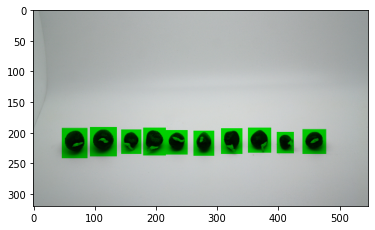

Accuracy = 0.9875
Correct seeds = 79
Prediction = [[1]]
Accuracy = 0.9876543209876543
Correct seeds = 80
Prediction = [[1]]
Accuracy = 0.9878048780487805
Correct seeds = 81
Prediction = [[1]]
Accuracy = 0.9879518072289156
Correct seeds = 82
Prediction = [[1]]
Accuracy = 0.9880952380952381
Correct seeds = 83
Prediction = [[1]]
Accuracy = 0.9882352941176471
Correct seeds = 84
Prediction = [[1]]
Accuracy = 0.9883720930232558
Correct seeds = 85
Prediction = [[1]]
Accuracy = 0.9885057471264368
Correct seeds = 86
Prediction = [[1]]
Accuracy = 0.9886363636363636
Correct seeds = 87
Prediction = [[1]]
Accuracy = 0.9887640449438202
Correct seeds = 88
Prediction = [[1]]


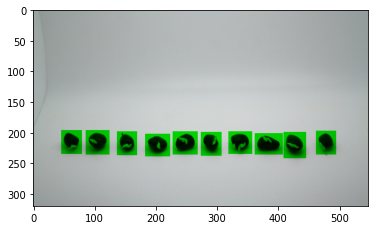

Accuracy = 0.9888888888888889
Correct seeds = 89
Prediction = [[1]]
Accuracy = 0.978021978021978
Correct seeds = 89
Prediction = [[0]]
Accuracy = 0.9782608695652174
Correct seeds = 90
Prediction = [[1]]
Accuracy = 0.978494623655914
Correct seeds = 91
Prediction = [[1]]
Accuracy = 0.9787234042553191
Correct seeds = 92
Prediction = [[1]]
Accuracy = 0.9789473684210527
Correct seeds = 93
Prediction = [[1]]
Accuracy = 0.9791666666666666
Correct seeds = 94
Prediction = [[1]]
Accuracy = 0.979381443298969
Correct seeds = 95
Prediction = [[1]]
Accuracy = 0.9795918367346939
Correct seeds = 96
Prediction = [[1]]
Accuracy = 0.9797979797979798
Correct seeds = 97
Prediction = [[1]]


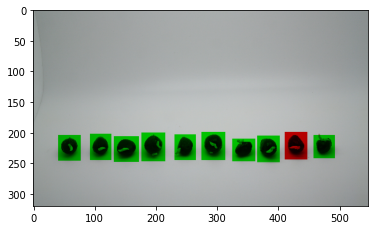

Accuracy = 0.97
Correct seeds = 97
Prediction = [[0]]
Accuracy = 0.9702970297029703
Correct seeds = 98
Prediction = [[1]]
Accuracy = 0.9607843137254902
Correct seeds = 98
Prediction = [[0]]
Accuracy = 0.9611650485436893
Correct seeds = 99
Prediction = [[1]]
Accuracy = 0.9615384615384616
Correct seeds = 100
Prediction = [[1]]
Accuracy = 0.9619047619047619
Correct seeds = 101
Prediction = [[1]]
Accuracy = 0.9622641509433962
Correct seeds = 102
Prediction = [[1]]
Accuracy = 0.9626168224299065
Correct seeds = 103
Prediction = [[1]]
Accuracy = 0.9629629629629629
Correct seeds = 104
Prediction = [[1]]
Accuracy = 0.963302752293578
Correct seeds = 105
Prediction = [[1]]


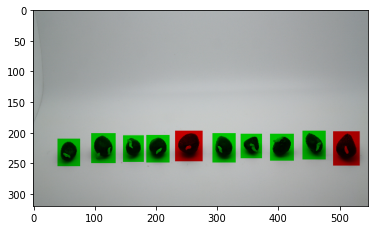

Accuracy = 0.9636363636363636
Correct seeds = 106
Prediction = [[1]]
Accuracy = 0.963963963963964
Correct seeds = 107
Prediction = [[1]]
Accuracy = 0.9642857142857143
Correct seeds = 108
Prediction = [[1]]
Accuracy = 0.9646017699115044
Correct seeds = 109
Prediction = [[1]]
Accuracy = 0.9649122807017544
Correct seeds = 110
Prediction = [[1]]
Accuracy = 0.9652173913043478
Correct seeds = 111
Prediction = [[1]]
Accuracy = 0.9655172413793104
Correct seeds = 112
Prediction = [[1]]
Accuracy = 0.9658119658119658
Correct seeds = 113
Prediction = [[1]]
Accuracy = 0.9661016949152542
Correct seeds = 114
Prediction = [[1]]
Accuracy = 0.9663865546218487
Correct seeds = 115
Prediction = [[1]]


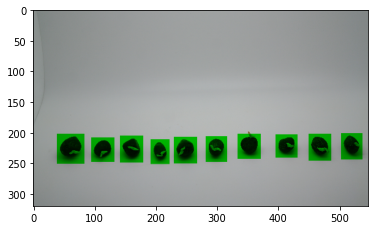

Accuracy = 0.9583333333333334
Correct seeds = 115
Prediction = [[0]]
Accuracy = 0.9586776859504132
Correct seeds = 116
Prediction = [[1]]
Accuracy = 0.9590163934426229
Correct seeds = 117
Prediction = [[1]]
Accuracy = 0.959349593495935
Correct seeds = 118
Prediction = [[1]]
Accuracy = 0.9596774193548387
Correct seeds = 119
Prediction = [[1]]
Accuracy = 0.96
Correct seeds = 120
Prediction = [[1]]
Accuracy = 0.9603174603174603
Correct seeds = 121
Prediction = [[1]]
Accuracy = 0.9606299212598425
Correct seeds = 122
Prediction = [[1]]
Accuracy = 0.9609375
Correct seeds = 123
Prediction = [[1]]
Accuracy = 0.9612403100775194
Correct seeds = 124
Prediction = [[1]]


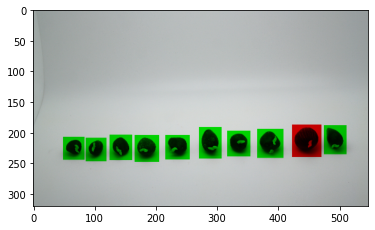

Accuracy = 0.9615384615384616
Correct seeds = 125
Prediction = [[1]]
Accuracy = 0.9618320610687023
Correct seeds = 126
Prediction = [[1]]
Accuracy = 0.9621212121212122
Correct seeds = 127
Prediction = [[1]]
Accuracy = 0.9624060150375939
Correct seeds = 128
Prediction = [[1]]
Accuracy = 0.9626865671641791
Correct seeds = 129
Prediction = [[1]]
Accuracy = 0.9629629629629629
Correct seeds = 130
Prediction = [[1]]
Accuracy = 0.9632352941176471
Correct seeds = 131
Prediction = [[1]]
Accuracy = 0.9635036496350365
Correct seeds = 132
Prediction = [[1]]
Accuracy = 0.9637681159420289
Correct seeds = 133
Prediction = [[1]]
Accuracy = 0.9640287769784173
Correct seeds = 134
Prediction = [[1]]


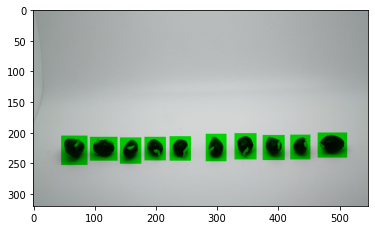

Accuracy = 0.9642857142857143
Correct seeds = 135
Prediction = [[1]]
Accuracy = 0.9645390070921985
Correct seeds = 136
Prediction = [[1]]
Accuracy = 0.9647887323943662
Correct seeds = 137
Prediction = [[1]]
Accuracy = 0.965034965034965
Correct seeds = 138
Prediction = [[1]]
Accuracy = 0.9652777777777778
Correct seeds = 139
Prediction = [[1]]
Accuracy = 0.9655172413793104
Correct seeds = 140
Prediction = [[1]]
Accuracy = 0.9657534246575342
Correct seeds = 141
Prediction = [[1]]
Accuracy = 0.9659863945578231
Correct seeds = 142
Prediction = [[1]]
Accuracy = 0.9662162162162162
Correct seeds = 143
Prediction = [[1]]
Accuracy = 0.9664429530201343
Correct seeds = 144
Prediction = [[1]]


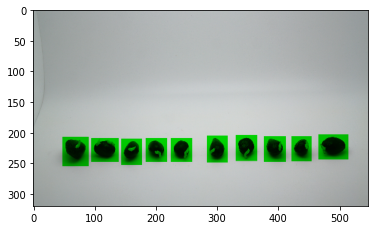

Accuracy = 0.9666666666666667
Correct seeds = 145
Prediction = [[1]]
Accuracy = 0.9668874172185431
Correct seeds = 146
Prediction = [[1]]
Accuracy = 0.9605263157894737
Correct seeds = 146
Prediction = [[0]]
Accuracy = 0.9607843137254902
Correct seeds = 147
Prediction = [[1]]
Accuracy = 0.961038961038961
Correct seeds = 148
Prediction = [[1]]
Accuracy = 0.9612903225806452
Correct seeds = 149
Prediction = [[1]]
Accuracy = 0.9615384615384616
Correct seeds = 150
Prediction = [[1]]
Accuracy = 0.9617834394904459
Correct seeds = 151
Prediction = [[1]]
Accuracy = 0.9620253164556962
Correct seeds = 152
Prediction = [[1]]
Accuracy = 0.9622641509433962
Correct seeds = 153
Prediction = [[1]]


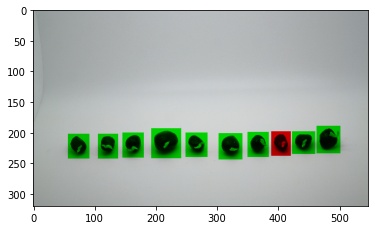

Accuracy = 0.9625
Correct seeds = 154
Prediction = [[1]]
Accuracy = 0.9627329192546584
Correct seeds = 155
Prediction = [[1]]
Accuracy = 0.9629629629629629
Correct seeds = 156
Prediction = [[1]]
Accuracy = 0.9631901840490797
Correct seeds = 157
Prediction = [[1]]
Accuracy = 0.9573170731707317
Correct seeds = 157
Prediction = [[0]]
Accuracy = 0.9515151515151515
Correct seeds = 157
Prediction = [[0]]
Accuracy = 0.9518072289156626
Correct seeds = 158
Prediction = [[1]]
Accuracy = 0.9520958083832335
Correct seeds = 159
Prediction = [[1]]
Accuracy = 0.9523809523809523
Correct seeds = 160
Prediction = [[1]]
Accuracy = 0.9526627218934911
Correct seeds = 161
Prediction = [[1]]


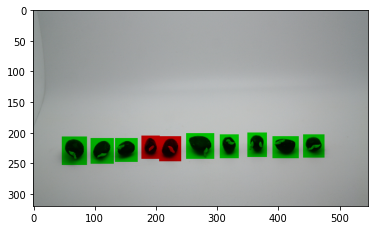

Accuracy = 0.9529411764705882
Correct seeds = 162
Prediction = [[1]]
Accuracy = 0.9532163742690059
Correct seeds = 163
Prediction = [[1]]
Accuracy = 0.9534883720930233
Correct seeds = 164
Prediction = [[1]]
Accuracy = 0.953757225433526
Correct seeds = 165
Prediction = [[1]]
Accuracy = 0.9540229885057471
Correct seeds = 166
Prediction = [[1]]
Accuracy = 0.9542857142857143
Correct seeds = 167
Prediction = [[1]]
Accuracy = 0.9545454545454546
Correct seeds = 168
Prediction = [[1]]
Accuracy = 0.9548022598870056
Correct seeds = 169
Prediction = [[1]]
Accuracy = 0.9550561797752809
Correct seeds = 170
Prediction = [[1]]
Accuracy = 0.9553072625698324
Correct seeds = 171
Prediction = [[1]]


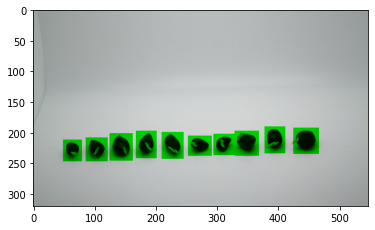

Accuracy = 0.9555555555555556
Correct seeds = 172
Prediction = [[1]]
Accuracy = 0.9558011049723757
Correct seeds = 173
Prediction = [[1]]
Accuracy = 0.9560439560439561
Correct seeds = 174
Prediction = [[1]]
Accuracy = 0.9562841530054644
Correct seeds = 175
Prediction = [[1]]
Accuracy = 0.9565217391304348
Correct seeds = 176
Prediction = [[1]]
Accuracy = 0.9567567567567568
Correct seeds = 177
Prediction = [[1]]
Accuracy = 0.956989247311828
Correct seeds = 178
Prediction = [[1]]
Accuracy = 0.9572192513368984
Correct seeds = 179
Prediction = [[1]]
Accuracy = 0.9574468085106383
Correct seeds = 180
Prediction = [[1]]
Accuracy = 0.9576719576719577
Correct seeds = 181
Prediction = [[1]]


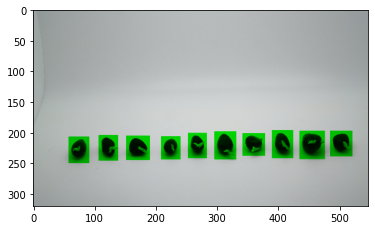

Accuracy = 0.9526315789473684
Correct seeds = 181
Prediction = [[0]]
Accuracy = 0.9528795811518325
Correct seeds = 182
Prediction = [[1]]
Accuracy = 0.953125
Correct seeds = 183
Prediction = [[1]]
Accuracy = 0.9533678756476683
Correct seeds = 184
Prediction = [[1]]
Accuracy = 0.9536082474226805
Correct seeds = 185
Prediction = [[1]]
Accuracy = 0.9538461538461539
Correct seeds = 186
Prediction = [[1]]
Accuracy = 0.9540816326530612
Correct seeds = 187
Prediction = [[1]]
Accuracy = 0.9543147208121827
Correct seeds = 188
Prediction = [[1]]
Accuracy = 0.9545454545454546
Correct seeds = 189
Prediction = [[1]]
Accuracy = 0.9547738693467337
Correct seeds = 190
Prediction = [[1]]
Accuracy = 0.955
Correct seeds = 191
Prediction = [[1]]


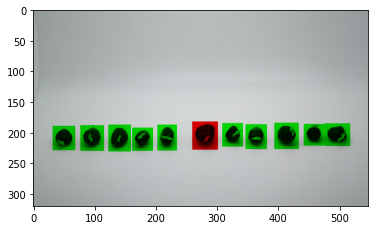

Accuracy = 0.9552238805970149
Correct seeds = 192
Prediction = [[0]]
Accuracy = 0.9554455445544554
Correct seeds = 193
Prediction = [[0]]
Accuracy = 0.9556650246305419
Correct seeds = 194
Prediction = [[0]]
Accuracy = 0.9558823529411765
Correct seeds = 195
Prediction = [[0]]
Accuracy = 0.9560975609756097
Correct seeds = 196
Prediction = [[0]]
Accuracy = 0.9563106796116505
Correct seeds = 197
Prediction = [[0]]
Accuracy = 0.9565217391304348
Correct seeds = 198
Prediction = [[0]]
Accuracy = 0.9519230769230769
Correct seeds = 198
Prediction = [[1]]
Accuracy = 0.9521531100478469
Correct seeds = 199
Prediction = [[0]]
Accuracy = 0.9523809523809523
Correct seeds = 200
Prediction = [[0]]


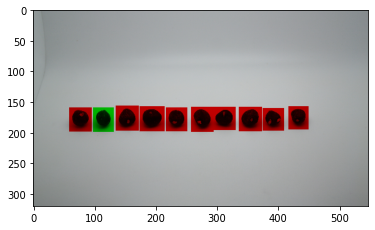

Accuracy = 0.95260663507109
Correct seeds = 201
Prediction = [[0]]
Accuracy = 0.9528301886792453
Correct seeds = 202
Prediction = [[0]]
Accuracy = 0.9530516431924883
Correct seeds = 203
Prediction = [[0]]
Accuracy = 0.9532710280373832
Correct seeds = 204
Prediction = [[0]]
Accuracy = 0.9534883720930233
Correct seeds = 205
Prediction = [[0]]
Accuracy = 0.9537037037037037
Correct seeds = 206
Prediction = [[0]]
Accuracy = 0.9493087557603687
Correct seeds = 206
Prediction = [[1]]
Accuracy = 0.9495412844036697
Correct seeds = 207
Prediction = [[0]]
Accuracy = 0.9497716894977168
Correct seeds = 208
Prediction = [[0]]
Accuracy = 0.95
Correct seeds = 209
Prediction = [[0]]


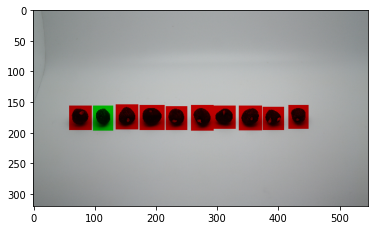

Accuracy = 0.9502262443438914
Correct seeds = 210
Prediction = [[0]]
Accuracy = 0.9504504504504504
Correct seeds = 211
Prediction = [[0]]
Accuracy = 0.9506726457399103
Correct seeds = 212
Prediction = [[0]]
Accuracy = 0.9508928571428571
Correct seeds = 213
Prediction = [[0]]
Accuracy = 0.9511111111111111
Correct seeds = 214
Prediction = [[0]]
Accuracy = 0.9513274336283186
Correct seeds = 215
Prediction = [[0]]
Accuracy = 0.9515418502202643
Correct seeds = 216
Prediction = [[0]]
Accuracy = 0.9517543859649122
Correct seeds = 217
Prediction = [[0]]
Accuracy = 0.9519650655021834
Correct seeds = 218
Prediction = [[0]]
Accuracy = 0.9521739130434783
Correct seeds = 219
Prediction = [[0]]


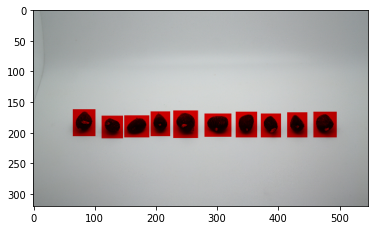

Accuracy = 0.9523809523809523
Correct seeds = 220
Prediction = [[0]]
Accuracy = 0.9525862068965517
Correct seeds = 221
Prediction = [[0]]
Accuracy = 0.9527896995708155
Correct seeds = 222
Prediction = [[0]]
Accuracy = 0.9529914529914529
Correct seeds = 223
Prediction = [[0]]
Accuracy = 0.9531914893617022
Correct seeds = 224
Prediction = [[0]]
Accuracy = 0.9533898305084746
Correct seeds = 225
Prediction = [[0]]
Accuracy = 0.9535864978902954
Correct seeds = 226
Prediction = [[0]]
Accuracy = 0.9495798319327731
Correct seeds = 226
Prediction = [[1]]
Accuracy = 0.9497907949790795
Correct seeds = 227
Prediction = [[0]]
Accuracy = 0.95
Correct seeds = 228
Prediction = [[0]]


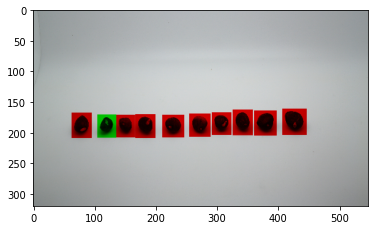

Accuracy = 0.950207468879668
Correct seeds = 229
Prediction = [[0]]
Accuracy = 0.9504132231404959
Correct seeds = 230
Prediction = [[0]]
Accuracy = 0.9506172839506173
Correct seeds = 231
Prediction = [[0]]
Accuracy = 0.9508196721311475
Correct seeds = 232
Prediction = [[0]]
Accuracy = 0.9510204081632653
Correct seeds = 233
Prediction = [[0]]
Accuracy = 0.9512195121951219
Correct seeds = 234
Prediction = [[0]]
Accuracy = 0.951417004048583
Correct seeds = 235
Prediction = [[0]]
Accuracy = 0.9516129032258065
Correct seeds = 236
Prediction = [[0]]
Accuracy = 0.9518072289156626
Correct seeds = 237
Prediction = [[0]]
Accuracy = 0.952
Correct seeds = 238
Prediction = [[0]]


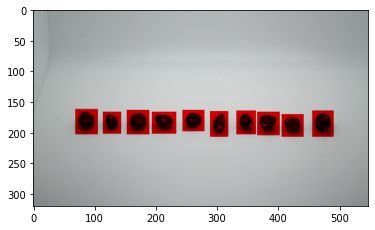

Accuracy = 0.952191235059761
Correct seeds = 239
Prediction = [[0]]
Accuracy = 0.9523809523809523
Correct seeds = 240
Prediction = [[0]]
Accuracy = 0.9525691699604744
Correct seeds = 241
Prediction = [[0]]
Accuracy = 0.952755905511811
Correct seeds = 242
Prediction = [[0]]
Accuracy = 0.9529411764705882
Correct seeds = 243
Prediction = [[0]]
Accuracy = 0.953125
Correct seeds = 244
Prediction = [[0]]
Accuracy = 0.953307392996109
Correct seeds = 245
Prediction = [[0]]
Accuracy = 0.9534883720930233
Correct seeds = 246
Prediction = [[0]]
Accuracy = 0.9536679536679536
Correct seeds = 247
Prediction = [[0]]
Accuracy = 0.9538461538461539
Correct seeds = 248
Prediction = [[0]]


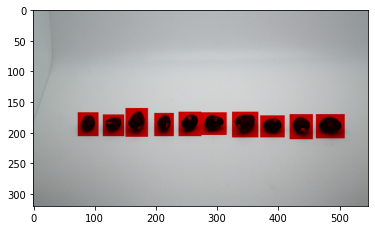

Accuracy = 0.9501915708812261
Correct seeds = 248
Prediction = [[1]]
Accuracy = 0.950381679389313
Correct seeds = 249
Prediction = [[0]]
Accuracy = 0.9505703422053232
Correct seeds = 250
Prediction = [[0]]
Accuracy = 0.9507575757575758
Correct seeds = 251
Prediction = [[0]]
Accuracy = 0.9509433962264151
Correct seeds = 252
Prediction = [[0]]
Accuracy = 0.9511278195488722
Correct seeds = 253
Prediction = [[0]]
Accuracy = 0.951310861423221
Correct seeds = 254
Prediction = [[0]]
Accuracy = 0.9514925373134329
Correct seeds = 255
Prediction = [[0]]
Accuracy = 0.9516728624535316
Correct seeds = 256
Prediction = [[0]]
Accuracy = 0.9518518518518518
Correct seeds = 257
Prediction = [[0]]


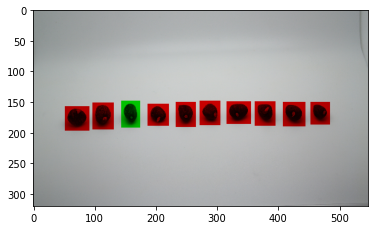

Accuracy = 0.9520295202952029
Correct seeds = 258
Prediction = [[0]]
Accuracy = 0.9522058823529411
Correct seeds = 259
Prediction = [[0]]
Accuracy = 0.9523809523809523
Correct seeds = 260
Prediction = [[0]]
Accuracy = 0.9525547445255474
Correct seeds = 261
Prediction = [[0]]
Accuracy = 0.9527272727272728
Correct seeds = 262
Prediction = [[0]]
Accuracy = 0.9528985507246377
Correct seeds = 263
Prediction = [[0]]
Accuracy = 0.9530685920577617
Correct seeds = 264
Prediction = [[0]]
Accuracy = 0.9532374100719424
Correct seeds = 265
Prediction = [[0]]
Accuracy = 0.9498207885304659
Correct seeds = 265
Prediction = [[1]]
Accuracy = 0.9464285714285714
Correct seeds = 265
Prediction = [[1]]


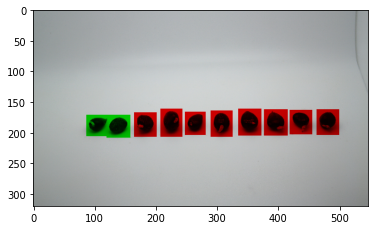

Accuracy = 0.9466192170818505
Correct seeds = 266
Prediction = [[0]]
Accuracy = 0.9468085106382979
Correct seeds = 267
Prediction = [[0]]
Accuracy = 0.9469964664310954
Correct seeds = 268
Prediction = [[0]]
Accuracy = 0.9471830985915493
Correct seeds = 269
Prediction = [[0]]
Accuracy = 0.9473684210526315
Correct seeds = 270
Prediction = [[0]]
Accuracy = 0.9475524475524476
Correct seeds = 271
Prediction = [[0]]
Accuracy = 0.9477351916376306
Correct seeds = 272
Prediction = [[0]]
Accuracy = 0.9479166666666666
Correct seeds = 273
Prediction = [[0]]
Accuracy = 0.9480968858131488
Correct seeds = 274
Prediction = [[0]]
Accuracy = 0.9482758620689655
Correct seeds = 275
Prediction = [[0]]


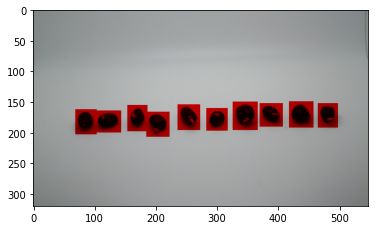

Accuracy = 0.9484536082474226
Correct seeds = 276
Prediction = [[0]]
Accuracy = 0.9486301369863014
Correct seeds = 277
Prediction = [[0]]
Accuracy = 0.9488054607508533
Correct seeds = 278
Prediction = [[0]]
Accuracy = 0.9489795918367347
Correct seeds = 279
Prediction = [[0]]
Accuracy = 0.9491525423728814
Correct seeds = 280
Prediction = [[0]]
Accuracy = 0.9493243243243243
Correct seeds = 281
Prediction = [[0]]
Accuracy = 0.9494949494949495
Correct seeds = 282
Prediction = [[0]]
Accuracy = 0.9496644295302014
Correct seeds = 283
Prediction = [[0]]
Accuracy = 0.9464882943143813
Correct seeds = 283
Prediction = [[1]]
Accuracy = 0.9466666666666667
Correct seeds = 284
Prediction = [[0]]


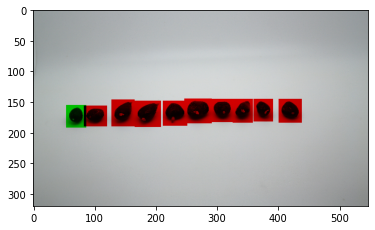

Accuracy = 0.946843853820598
Correct seeds = 285
Prediction = [[0]]
Accuracy = 0.9470198675496688
Correct seeds = 286
Prediction = [[0]]
Accuracy = 0.9471947194719472
Correct seeds = 287
Prediction = [[0]]
Accuracy = 0.9473684210526315
Correct seeds = 288
Prediction = [[0]]
Accuracy = 0.9475409836065574
Correct seeds = 289
Prediction = [[0]]
Accuracy = 0.9444444444444444
Correct seeds = 289
Prediction = [[1]]
Accuracy = 0.9446254071661238
Correct seeds = 290
Prediction = [[0]]
Accuracy = 0.9448051948051948
Correct seeds = 291
Prediction = [[0]]
Accuracy = 0.9449838187702265
Correct seeds = 292
Prediction = [[0]]
Accuracy = 0.9451612903225807
Correct seeds = 293
Prediction = [[0]]


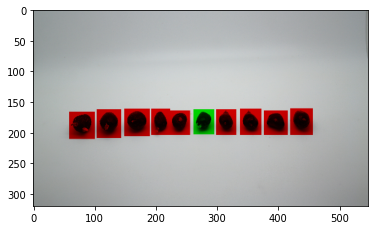

Accuracy = 0.9453376205787781
Correct seeds = 294
Prediction = [[0]]
Accuracy = 0.9455128205128205
Correct seeds = 295
Prediction = [[0]]
Accuracy = 0.9456869009584664
Correct seeds = 296
Prediction = [[0]]
Accuracy = 0.945859872611465
Correct seeds = 297
Prediction = [[0]]
Accuracy = 0.946031746031746
Correct seeds = 298
Prediction = [[0]]
Accuracy = 0.9462025316455697
Correct seeds = 299
Prediction = [[0]]
Accuracy = 0.9463722397476341
Correct seeds = 300
Prediction = [[0]]
Accuracy = 0.9465408805031447
Correct seeds = 301
Prediction = [[0]]
Accuracy = 0.9467084639498433
Correct seeds = 302
Prediction = [[0]]
Accuracy = 0.946875
Correct seeds = 303
Prediction = [[0]]


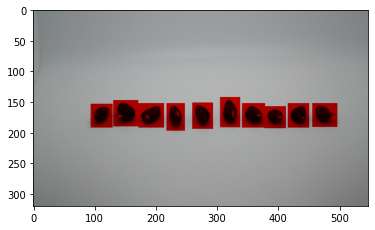

Accuracy = 0.9439252336448598
Correct seeds = 303
Prediction = [[1]]
Accuracy = 0.9440993788819876
Correct seeds = 304
Prediction = [[0]]
Accuracy = 0.9442724458204335
Correct seeds = 305
Prediction = [[0]]
Accuracy = 0.9444444444444444
Correct seeds = 306
Prediction = [[0]]
Accuracy = 0.9446153846153846
Correct seeds = 307
Prediction = [[0]]
Accuracy = 0.9447852760736196
Correct seeds = 308
Prediction = [[0]]
Accuracy = 0.944954128440367
Correct seeds = 309
Prediction = [[0]]
Accuracy = 0.9451219512195121
Correct seeds = 310
Prediction = [[0]]
Accuracy = 0.9452887537993921
Correct seeds = 311
Prediction = [[0]]
Accuracy = 0.9454545454545454
Correct seeds = 312
Prediction = [[0]]


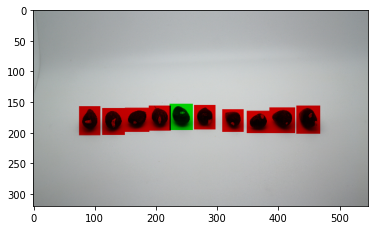

Accuracy = 0.945619335347432
Correct seeds = 313
Prediction = [[0]]
Accuracy = 0.9457831325301205
Correct seeds = 314
Prediction = [[0]]
Accuracy = 0.9459459459459459
Correct seeds = 315
Prediction = [[0]]
Accuracy = 0.9461077844311377
Correct seeds = 316
Prediction = [[0]]
Accuracy = 0.9462686567164179
Correct seeds = 317
Prediction = [[0]]
Accuracy = 0.9464285714285714
Correct seeds = 318
Prediction = [[0]]
Accuracy = 0.9465875370919882
Correct seeds = 319
Prediction = [[0]]
Accuracy = 0.9467455621301775
Correct seeds = 320
Prediction = [[0]]
Accuracy = 0.9469026548672567
Correct seeds = 321
Prediction = [[0]]
Accuracy = 0.9470588235294117
Correct seeds = 322
Prediction = [[0]]


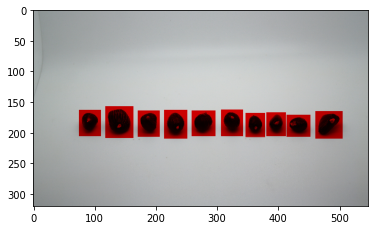

Accuracy = 0.9472140762463344
Correct seeds = 323
Prediction = [[0]]
Accuracy = 0.9473684210526315
Correct seeds = 324
Prediction = [[0]]
Accuracy = 0.9475218658892128
Correct seeds = 325
Prediction = [[0]]
Accuracy = 0.9476744186046512
Correct seeds = 326
Prediction = [[0]]
Accuracy = 0.9478260869565217
Correct seeds = 327
Prediction = [[0]]
Accuracy = 0.9479768786127167
Correct seeds = 328
Prediction = [[0]]
Accuracy = 0.9481268011527377
Correct seeds = 329
Prediction = [[0]]
Accuracy = 0.9482758620689655
Correct seeds = 330
Prediction = [[0]]
Accuracy = 0.9484240687679083
Correct seeds = 331
Prediction = [[0]]
Accuracy = 0.9485714285714286
Correct seeds = 332
Prediction = [[0]]


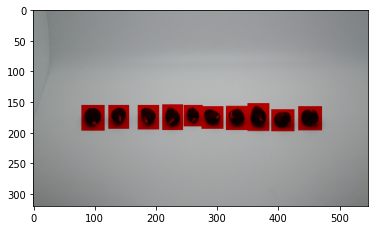

Accuracy = 0.9487179487179487
Correct seeds = 333
Prediction = [[0]]
Accuracy = 0.9488636363636364
Correct seeds = 334
Prediction = [[0]]
Accuracy = 0.9490084985835694
Correct seeds = 335
Prediction = [[0]]
Accuracy = 0.9491525423728814
Correct seeds = 336
Prediction = [[0]]
Accuracy = 0.9492957746478873
Correct seeds = 337
Prediction = [[0]]
Accuracy = 0.949438202247191
Correct seeds = 338
Prediction = [[0]]
Accuracy = 0.9495798319327731
Correct seeds = 339
Prediction = [[0]]
Accuracy = 0.9497206703910615
Correct seeds = 340
Prediction = [[0]]
Accuracy = 0.947075208913649
Correct seeds = 340
Prediction = [[1]]
Accuracy = 0.9472222222222222
Correct seeds = 341
Prediction = [[0]]


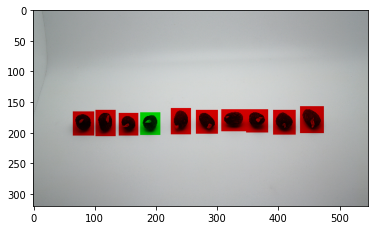

Accuracy = 0.9473684210526315
Correct seeds = 342
Prediction = [[0]]
Accuracy = 0.9475138121546961
Correct seeds = 343
Prediction = [[0]]
Accuracy = 0.9476584022038568
Correct seeds = 344
Prediction = [[0]]
Accuracy = 0.9478021978021978
Correct seeds = 345
Prediction = [[0]]
Accuracy = 0.947945205479452
Correct seeds = 346
Prediction = [[0]]
Accuracy = 0.9480874316939891
Correct seeds = 347
Prediction = [[0]]
Accuracy = 0.9482288828337875
Correct seeds = 348
Prediction = [[0]]
Accuracy = 0.9483695652173914
Correct seeds = 349
Prediction = [[0]]
Accuracy = 0.948509485094851
Correct seeds = 350
Prediction = [[0]]
Accuracy = 0.9486486486486486
Correct seeds = 351
Prediction = [[0]]


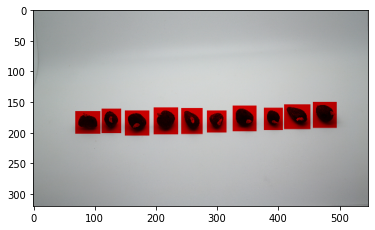

Accuracy = 0.9487870619946092
Correct seeds = 352
Prediction = [[0]]
Accuracy = 0.9489247311827957
Correct seeds = 353
Prediction = [[0]]
Accuracy = 0.9490616621983914
Correct seeds = 354
Prediction = [[0]]
Accuracy = 0.9491978609625669
Correct seeds = 355
Prediction = [[0]]
Accuracy = 0.9466666666666667
Correct seeds = 355
Prediction = [[1]]
Accuracy = 0.9468085106382979
Correct seeds = 356
Prediction = [[0]]
Accuracy = 0.946949602122016
Correct seeds = 357
Prediction = [[0]]
Accuracy = 0.9470899470899471
Correct seeds = 358
Prediction = [[0]]
Accuracy = 0.9472295514511874
Correct seeds = 359
Prediction = [[0]]
Accuracy = 0.9473684210526315
Correct seeds = 360
Prediction = [[0]]


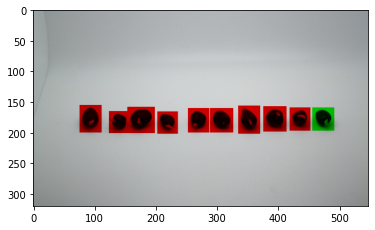

Accuracy = 0.94750656167979
Correct seeds = 361
Prediction = [[0]]
Accuracy = 0.9476439790575916
Correct seeds = 362
Prediction = [[0]]
Accuracy = 0.9477806788511749
Correct seeds = 363
Prediction = [[0]]
Accuracy = 0.9479166666666666
Correct seeds = 364
Prediction = [[0]]
Accuracy = 0.948051948051948
Correct seeds = 365
Prediction = [[0]]
Accuracy = 0.9481865284974094
Correct seeds = 366
Prediction = [[0]]
Accuracy = 0.9457364341085271
Correct seeds = 366
Prediction = [[1]]
Accuracy = 0.9458762886597938
Correct seeds = 367
Prediction = [[0]]
Accuracy = 0.9460154241645244
Correct seeds = 368
Prediction = [[0]]
Accuracy = 0.9461538461538461
Correct seeds = 369
Prediction = [[0]]


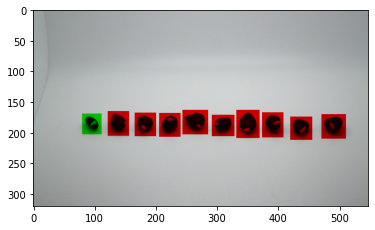

Accuracy = 0.9462915601023018
Correct seeds = 370
Prediction = [[0]]
Accuracy = 0.9464285714285714
Correct seeds = 371
Prediction = [[0]]
Accuracy = 0.9465648854961832
Correct seeds = 372
Prediction = [[0]]
Accuracy = 0.9467005076142132
Correct seeds = 373
Prediction = [[0]]
Accuracy = 0.9468354430379747
Correct seeds = 374
Prediction = [[0]]
Accuracy = 0.946969696969697
Correct seeds = 375
Prediction = [[0]]
Accuracy = 0.947103274559194
Correct seeds = 376
Prediction = [[0]]
Accuracy = 0.9472361809045227
Correct seeds = 377
Prediction = [[0]]
Accuracy = 0.9473684210526315
Correct seeds = 378
Prediction = [[0]]
Accuracy = 0.9475
Correct seeds = 379
Prediction = [[0]]


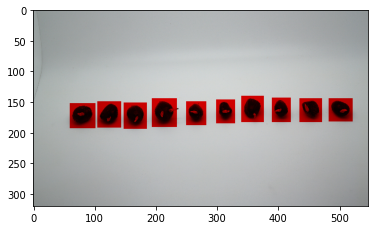

TP:  191
FN:  9
TN:  188
FP:  12


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from csv import reader
import tensorflow as tf
import matplotlib.pyplot as plt

count_correct = 0
count_total = 0
TP = 0 # count_good_correct
FN = 0 # count_good_incorrect
TN = 0 # count_bad_correct
FP = 0  # count_bad_incorrect
prediction_GS = []
prediction_BS = []

with open ('/content/drive/My Drive/AAR/testdata.csv', 'r') as read_obj:
  csv_reader = reader(read_obj)

  header = next(csv_reader)

  for row in csv_reader:

    if row[1] == '0':
      path = '/content/drive/My Drive/AAR/seed/BadSeed/' + row[0]
      #print('Seed Type : ' + row[0])
    else:
      path = '/content/drive/My Drive/AAR/seed/GoodSeed/' + row[0]
      #print('Seed Type : ' + row[0])

    # perform seed detection for test data before using cnn for classification
    # same operation performed on training data set
    image = cv2.imread(path, cv2.IMREAD_UNCHANGED)

    image = image[200:3400, 0:5472]
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    ori_image = image

    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    image = cv2.threshold(image, 90, 255, cv2.THRESH_BINARY_INV)

    kernel = np.ones((50,50), np.uint8)
    image = cv2.morphologyEx(image[1], cv2.MORPH_CLOSE, kernel)
    kernel = np.ones((30,30), np.uint8)
    image = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

    n_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(image)
    for label in range(1,n_labels):
      width = stats[label, cv2.CC_STAT_WIDTH]
      height = stats[label, cv2.CC_STAT_HEIGHT]
      x = stats[label, cv2.CC_STAT_LEFT]
      y = stats[label, cv2.CC_STAT_TOP]

      horizontal_padding = 50
      vertical_padding = 50

      roi = ori_image[y- vertical_padding :(y+height+ vertical_padding ), x- horizontal_padding :(x+width+ horizontal_padding )] # add padding to boxes
      copy_image = ori_image[y- vertical_padding :(y+height+ vertical_padding ), x- horizontal_padding :(x+width+ horizontal_padding )]

      image = cv2.resize(roi, (256, 256))

      # perform image data process before using cnn
      x = tf.keras.preprocessing.image.img_to_array(image)
      x = np.expand_dims(x, axis=0)
      image = np.vstack([x])
      prediction = model.predict_classes(image) # return 1 or 0

      # put red or green shade on bounding box of the seeds according to the output of cnn
      if prediction == 1:
        #green
        copy_image[:,:,0] = np.zeros([copy_image.shape[0], copy_image.shape[1]])
        copy_image[:,:,2] = np.zeros([copy_image.shape[0], copy_image.shape[1]])
      else:
        #red
        copy_image[:,:,1] = np.zeros([copy_image.shape[0], copy_image.shape[1]])
        copy_image[:,:,2] = np.zeros([copy_image.shape[0], copy_image.shape[1]])

      # if prediction == int(row[1]):
      #   count_correct+=1
      
      if int(row[1]) == 1:
        if prediction == int(row[1]):
          count_correct+=1
          TP+=1
        else: 
          FN+=1

      else:
        if prediction == int(row[1]):
          count_correct+=1
          TN+=1
        else: 
          FP+=1
     
      count_total+=1

      print("Accuracy = " + str(count_correct/count_total))
      print("Correct seeds = " + str(count_correct))
      print("Prediction = " + str(prediction))

    #output
    #the original image with 10 seeds in it, but with bounding box around individual seed in red/green shade 
    scaling_factor = 0.10

    height = int(ori_image.shape[0] * scaling_factor)
    width = int(ori_image.shape[1] * scaling_factor)

    ori_image = cv2.resize(ori_image, (width, height))
    plt.imshow(ori_image)
    plt.show()

  print("TP: ", TP)
  print("FN: ", FN)
  print("TN: ", TN)
  print("FP: ", FP)

EVALUATION METRICS

In [ ]:
# Calculate accuracy and precision
accuracy = 0
precision = 0
lesion = 0
background = 0
IoU = 0
dice = 0

accuracy = (TP + TN) / (TP + FP + FN + TN)
precision = TP / (TP + FP)

# Calculate IoU 
lesion=TP / (TP+FN+FP)  # penalises FP
background=TN / (TN+FN+FP)  # penalises FN
IoU=(lesion + background)/2

# Calculate dice coefficient
dice = 2*TP/(2*TP + FN + FP)
print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('IoU: {}'.format(IoU))
print('Dice coefficient: {}'.format(dice))

Accuracy: 0.9475
Precision: 0.9408866995073891
IoU: 0.9002324636634468
Dice coefficient: 0.9478908188585607


ROC CURVE

Found 347 validated image filenames belonging to 2 classes.
347/347 [==============================] - 7s 18ms/step


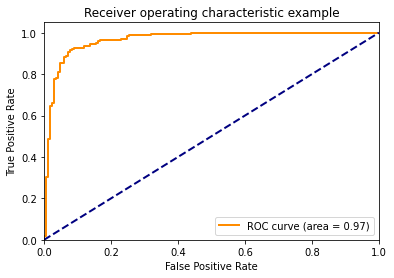

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

generator = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode="nearest",
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None,
)

validation_generator = generator.flow_from_dataframe(
    dataframe=df_validate,
    directory=path_crop,
    x_col="image_name",
    y_col="label",
    weight_col=None,
    color_mode="rgb",
    classes=['0','1'],
    class_mode="binary",
    batch_size=1,
    shuffle=False,
    seed=None,
    save_to_dir=None,
    save_prefix="",
    save_format="png",
    subset=None,
    interpolation="nearest",
    validate_filenames=True,
)

model.evaluate(validation_generator)

STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()
preds = model.predict(validation_generator, verbose=1)

fpr, tpr, _ = roc_curve(validation_generator.classes, preds)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()